In [2]:
# imports

import torch
from torch_geometric.data import Data
from torch_geometric.transforms import BaseTransform
from torch_geometric.datasets import TUDataset, ZINC
from ogb.graphproppred import PygGraphPropPredDataset

import numpy as np
import matplotlib.pyplot as plt
import itertools

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold

In [42]:
import experiments

In [235]:
from importlib import reload 

experiments = reload(experiments)

## load experiment data

### MUTAG

In [232]:
def make_tree_plot(experiment):
  scores_dict = experiment.load_score_data('Random_forest')
  scores = np.array([scores_dict[i].mean() for i in range(40)]).reshape((8,5))
  n_trees = range(2,7)
  fig = plt.figure()

  ax = fig.add_subplot()
  [ax.plot(n_trees, scores[i]) for i in range(8)]
  ax.set_title('Pattern graphs for ' + experiment.dataset_name)
  ax.set_xlabel('Max tree size')
  ax.set_ylabel('test accuracy')
  plt.show()


def make_cycle_plot(experiment):
  scores_dict = experiment.load_score_data('Random_forest')
  scores = np.array([scores_dict[i].mean() for i in range(40)]).reshape(8,5).transpose().reshape(10,4)
  n_cycles = range(3,7)
  fig = plt.figure()

  ax = fig.add_subplot()
  [ax.plot(n_cycles, scores[i]) for i in range(8)]
  ax.set_title('Pattern graphs for ' + experiment.dataset_name)
  ax.set_xlabel('Max cycle size')
  ax.set_ylabel('test accuracy')
  plt.show()

def make_clique_plot(experiment):
  scores_dict = experiment.load_score_data('Random_forest')
  scores = np.array([scores_dict[i].mean() for i in range(40)]).reshape(2,20).transpose()
  n_cliques = range(4,6)
  fig = plt.figure()

  ax = fig.add_subplot()
  [ax.plot(n_cliques, scores[i]) for i in range(8)]
  ax.set_title('Pattern graphs for ' + experiment.dataset_name)
  ax.set_xlabel('Max clique size')
  ax.set_ylabel('test accuracy')
  plt.show()

def make_big_plot(experiment):
  scores_dict = experiment.load_score_data('Random_forest')
  fig, (ax_trees, ax_cycles, ax_cliques) = plt.subplots(3, gridspec_kw={'hspace': 1.2})

  tree_scores = np.array([scores_dict[i].mean() for i in range(40)]).reshape((8,5))
  cycle_scores = np.array([scores_dict[i].mean() for i in range(40)]).reshape(8,5).transpose().reshape(10,4)
  clique_scores = np.array([scores_dict[i].mean() for i in range(40)]).reshape(2,20).transpose()
  
  n_trees = range(2,7)
  n_cycles = range(3,7)
  n_cliques = range(4,6)

  [ax_trees.plot(n_trees, tree_scores[i]) for i in range(8)]
  ax_trees.set_title('Pattern graphs for ' + experiment.dataset_name)
  ax_trees.set_xlabel('Max tree size')
  ax_trees.set_ylabel('test accuracy')

  [ax_cycles.plot(n_cycles, cycle_scores[i]) for i in range(10)]
  ax_cycles.set_title('Pattern graphs for ' + experiment.dataset_name)
  ax_cycles.set_xlabel('Max cycle size')
  ax_cycles.set_ylabel('test accuracy')

  [ax_cliques.plot(n_cliques, clique_scores[i]) for i in range(10)]
  ax_cliques.set_title('Pattern graphs for ' + experiment.dataset_name)
  ax_cliques.set_xlabel('Max clique size')
  ax_cliques.set_ylabel('test accuracy')

  fig.set_dpi(100)
  plt.show()





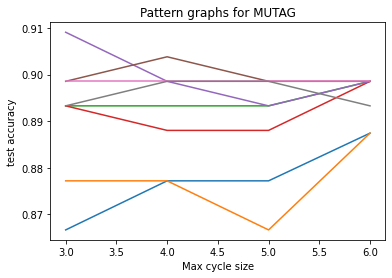

In [247]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/MUTAG', 
    encoder_name = 'ghc_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True, dataset_name = 'MUTAG')
#make_tree_plot(experiment)
make_cycle_plot(experiment)
#make_clique_plot(experiment)

In [138]:
{i:3 for i in range(3)}

{0: 3, 1: 3, 2: 3}

### NCI1

In [170]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/NCI1', 
    encoder_name = 'ghc_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True, dataset_name = 'NCI1')
datadict = experiment.load_data(get_value=True)
[(i, d.nums) for i,d in datadict.items()]

[(0, {'n_trees': 2, 'n_cycles': 3, 'n_cliques': 4}),
 (1, {'n_trees': 3, 'n_cycles': 3, 'n_cliques': 4}),
 (2, {'n_trees': 4, 'n_cycles': 3, 'n_cliques': 4}),
 (3, {'n_trees': 5, 'n_cycles': 3, 'n_cliques': 4}),
 (4, {'n_trees': 6, 'n_cycles': 3, 'n_cliques': 4}),
 (5, {'n_trees': 2, 'n_cycles': 4, 'n_cliques': 4}),
 (6, {'n_trees': 3, 'n_cycles': 4, 'n_cliques': 4}),
 (7, {'n_trees': 4, 'n_cycles': 4, 'n_cliques': 4}),
 (8, {'n_trees': 5, 'n_cycles': 4, 'n_cliques': 4}),
 (9, {'n_trees': 6, 'n_cycles': 4, 'n_cliques': 4}),
 (10, {'n_trees': 2, 'n_cycles': 5, 'n_cliques': 4}),
 (11, {'n_trees': 3, 'n_cycles': 5, 'n_cliques': 4}),
 (12, {'n_trees': 4, 'n_cycles': 5, 'n_cliques': 4}),
 (13, {'n_trees': 5, 'n_cycles': 5, 'n_cliques': 4}),
 (14, {'n_trees': 6, 'n_cycles': 5, 'n_cliques': 4}),
 (15, {'n_trees': 2, 'n_cycles': 6, 'n_cliques': 4}),
 (16, {'n_trees': 3, 'n_cycles': 6, 'n_cliques': 4}),
 (17, {'n_trees': 4, 'n_cycles': 6, 'n_cliques': 4}),
 (18, {'n_trees': 5, 'n_cycles': 6, 'n

In [192]:
np.arange(40).reshape(8,5).transpose().reshape(10,4)

array([[ 0,  5, 10, 15],
       [20, 25, 30, 35],
       [ 1,  6, 11, 16],
       [21, 26, 31, 36],
       [ 2,  7, 12, 17],
       [22, 27, 32, 37],
       [ 3,  8, 13, 18],
       [23, 28, 33, 38],
       [ 4,  9, 14, 19],
       [24, 29, 34, 39]])

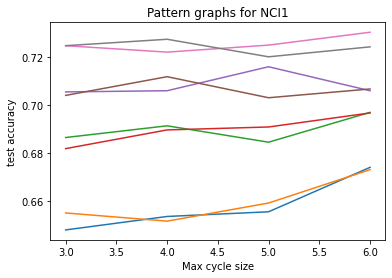

In [239]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/NCI1', 
    encoder_name = 'ghc_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True, dataset_name = 'NCI1')
#make_tree_plot(experiment)
make_cycle_plot(experiment)
#make_clique_plot(experiment)


In [ ]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/NCI1', 
    encoder_name = 'lagrangian_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True, dataset_name = 'NCI1')
#make_tree_plot(experiment)
make_cycle_plot(experiment)
#make_clique_plot(experiment)

In [72]:
# NCI1
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/NCI1', 
    encoder_name = 'ghc_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True)
experiment.evaluation(clf_name='Random_forest', cv_num = 10, scoring='accuracy')

In [102]:
# evaluation
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/NCI1', 
    encoder_name = 'ghc_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True)
scores_dict = experiment.load_score_data('Random_forest')
mean_list = np.array([(i,scores.mean(), scores.std()) for i,scores in scores_dict.items()])

In [105]:
datadict = experiment.load_data(get_value=True)

In [111]:
mean_dict = {i:(scores.mean(), scores.std()) for i,scores in scores_dict.items()}

In [125]:
j = 29
datadict[j].nums, scores_dict[j].mean(),  scores_dict[j].std()

({'n_trees': 6, 'n_cycles': 4, 'n_cliques': 5},
 0.7418491484184916,
 0.03180654549607573)

In [74]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/NCI1', 
    encoder_name = 'lagrangian_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True)
experiment.evaluation(clf_name='Random_forest', cv_num = 10, scoring='accuracy')

In [82]:
# evaluation
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/NCI1', 
    encoder_name = 'lagrangian_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True)
scores_dict = experiment.load_score_data('Random_forest')
mean_list = np.array([(i,scores.mean(), scores.std()) for i,scores in scores_dict.items()])
np.max(mean_list[:,1])

0.7525547445255475

### PROTEINS


In [84]:
### PROTEINS


In [85]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/PROTEINS', 
    encoder_name = 'ghc_aug', n_trees=7, n_cycles=7, n_cliques=6)
experiment.evaluation(clf_name='Random_forest', cv_num = 10, scoring='accuracy')

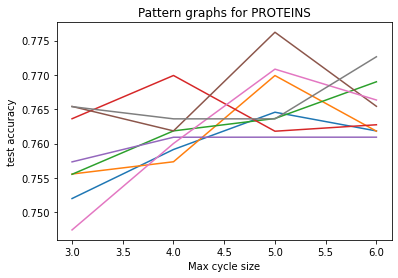

In [243]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/PROTEINS', 
              encoder_name = 'ghc_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True, dataset_name = 'PROTEINS')
#make_tree_plot(experiment)
make_cycle_plot(experiment)
#make_clique_plot(experiment)

In [ ]:
# evaluation
datadict = {}
for i in range(32):
    X = np.load('pattern_graphs/PROTEINS' + '/' +
                        'lagrangian_aug'+'/' + f'{i}_X.npy')
    y = np.load('pattern_graphs/PROTEINS''/' +
                        'lagrangian_aug'+'/' + f'{i}_y.npy')
    nums = np.load('pattern_graphs/PROTEINS' + '/'+'lagrangian_aug' +
                           '/' + f'{i}_nums.npy', allow_pickle=True).item()
    result = experiments.EncodingData(X, y, nums)
    datadict[i] = result

datadict

In [ ]:
def get_score(x): return x.calculate_cv_scores(
                clf_name = 'Random_forest', cv_num = 10)

scoredict = {}
for i, data in datadict.items():
    score_data = get_score(data)
    scoredict[i] = score_data

In [126]:
for i, data in scoredict.items():
    np.save('pattern_graphs/PROTEINS' + '/'+'lagrangian_aug' + 
            '/' + f'{i}_{data.clf_name}_scores.npy', data.scores)